In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [23]:
data = pd.read_csv("emails.csv")
data


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,Email 3120,7,4,1,1,0,1,34,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3120,Email 3121,0,0,1,0,1,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3121,Email 3122,0,0,1,0,1,0,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122,Email 3123,23,10,2,9,6,10,71,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [24]:
data.dtypes

,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,float64
allowing,float64
ff,float64
dry,float64


In [25]:
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,1
allowing,1
ff,1
dry,1


In [26]:
#data.columns.tolist()

In [27]:
data['Email No.']

,Email No.
0,Email 1
1,Email 2
2,Email 3
3,Email 4
4,Email 5
...,...
3119,Email 3120
3120,Email 3121
3121,Email 3122
3122,Email 3123


In [28]:
data['Email No.'] = data['Email No.'].str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2539598269.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Email No.'] = data['Email No.'].str.extract('(\d+)').astype(int)


In [29]:
data['Email No.']

,Email No.
0,1
1,2
2,3
3,4
4,5
...,...
3119,3120
3120,3121
3121,3122
3122,3123


In [30]:
data = data.drop('Email No.', axis=1)

In [31]:
data.shape

(3124, 3001)

In [32]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,...,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,6.174136,5.758323,6.004802,2.755442,3.048015,2.334827,52.918054,2.363316,2.423496,9.671895,...,0.008325,0.006404,0.008325,0.088377,0.005443,0.003202,0.004803,0.940762,0.005764,0.282101
std,10.947832,9.003478,16.972062,5.488822,4.450417,5.463991,85.377625,4.218824,8.288945,17.296909,...,0.136046,0.121215,0.097672,0.563009,0.114468,0.071517,0.081874,3.248123,0.075712,0.450094
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,27.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,4.000000,3.000000,4.000000,2.000000,61.000000,3.000000,2.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,39.000000,77.000000,1898.000000,49.000000,167.000000,223.000000,...,4.000000,5.000000,2.000000,12.000000,3.000000,3.000000,3.000000,114.000000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Columns: 3001 entries, the to Prediction
dtypes: float64(1448), int64(1553)
memory usage: 71.5 MB


In [34]:
data['Prediction'].value_counts()

,count
Prediction,
0.0,2242
1.0,881


In [35]:
X = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [41]:
# Ensure no NaNs or Infs in X or y
import numpy as np

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)



In [63]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
#KNeighborsClassifier(n_neighbors=2)

In [65]:
y_pred_knn = neigh.predict(X_test)

In [66]:
neigh.score(X_train, y_train)
#neigh.score(X_test, y_test)

0.9295718287314926

In [67]:
neigh.score(X_test, y_test)

0.9008

In [68]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred_knn)
cm


Confusion Matrix: 


array([[398,  41],
       [ 21, 165]])

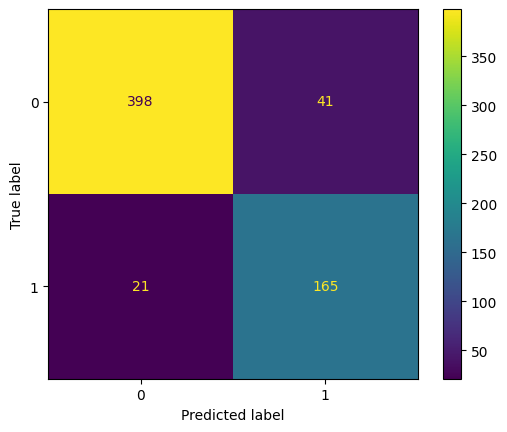

In [69]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [70]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       439
         1.0       0.80      0.89      0.84       186

    accuracy                           0.90       625
   macro avg       0.88      0.90      0.88       625
weighted avg       0.91      0.90      0.90       625



In [71]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred_knn)

accuracy_score: 


0.9008

In [72]:

print("precision_score: ")
precision_score(y_test, y_pred_knn)

precision_score: 


0.8009708737864077

In [73]:
print("recall_score: ")
recall_score(y_test, y_pred_knn)

recall_score: 


0.8870967741935484

In [74]:
print("Error: ")
1-accuracy_score(y_test, y_pred_knn)

Error: 


0.09919999999999995

In [75]:
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(X_train, y_train)

SVC(gamma='auto')

In [76]:
y_pred_svm = SVM.predict(X_test)

In [77]:
SVM.score(X_train, y_train)


0.9603841536614646

In [78]:
SVM.score(X_test, y_test)

0.8976

In [79]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred_svm)
cm

Confusion Matrix: 


array([[427,  12],
       [ 52, 134]])

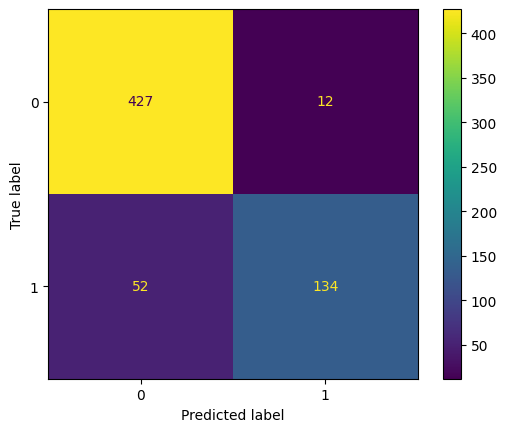

In [80]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [81]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       439
         1.0       0.92      0.72      0.81       186

    accuracy                           0.90       625
   macro avg       0.90      0.85      0.87       625
weighted avg       0.90      0.90      0.89       625



In [86]:
comparison = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_svm)]
    #'F1 Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm)]
})

print("\nModel Performance Comparison:\n")
print(comparison)


Model Performance Comparison:

  Model  Accuracy  Precision    Recall
0   KNN    0.9008   0.800971  0.887097
1   SVM    0.8976   0.917808  0.720430
